<h1><center> Kaggle challenge ideas </h1>

In this competition, we deﬁne an actor network where nodes represent actors and edges between two nodes
stand for co-occurrence on the same Wikipedia page. This is a proxy for their joint participation in the same
movie, for their personal relation, for their level of fame, etc. In addition to the graph structure, each node
(i.e., actor) is also associated with textual information processed from its Wikipedia page, from which some
keywords were extracted. Only the processed features are available here. Your goal is to utilize information
from both the underlying actor network and the processed Wikipedia description in order to accurately predict
missing edges.


- On peut regarder TP 2 et calculer les features de centralité, betweeness_centrality, source degree etc 


#### Machine Learning for Edge Prediction:

- Random forest , gradient boosting
- Clustering 
- Graph Neural Network


## 1-  Dataset Analysis

In [2]:
import pandas as pd 
from node2vec import Node2Vec
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import networkx as nx
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
csv_file = "node_information.csv"
df_features = pd.read_csv(csv_file, header=None)
df_features.rename(columns={0: "node"}, inplace=True)
df_features.head()

,node,1,2,3,4,5,6,7,8,9,...,923,924,925,926,927,928,929,930,931,932
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
with open('train.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]

df_training_edges = pd.DataFrame(edges, columns=['node1', 'node2', 'connected'])
df_training_edges.head()


,node1,node2,connected
0,939,3809,1
1,2442,5784,1
2,179,3809,1
3,857,2280,1
4,1358,5722,1


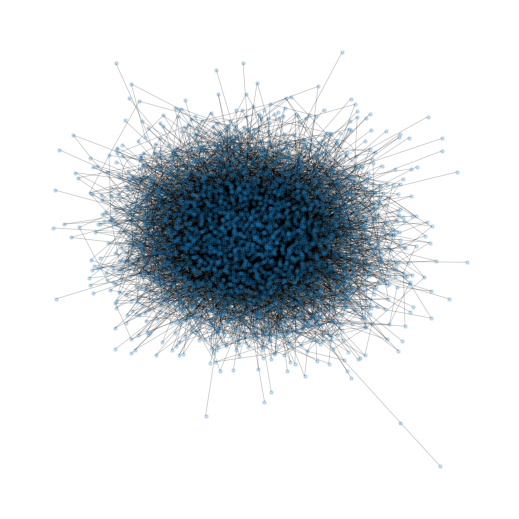

In [5]:
training_graph = nx.from_pandas_edgelist(df_training_edges, source='node1', target='node2', create_using=nx.Graph())
plt.figure(figsize=(5,5))

nx.draw(training_graph, node_size = 5, alpha = 0.2, width = 0.6)

plt.show()

In [6]:
#get features for the first node of training_graph
df_features[df_features['node'] == 1]

,node,1,2,3,4,5,6,7,8,9,...,923,924,925,926,927,928,929,930,931,932


## 2-  Training

In [7]:
df = pd.merge(df_training_edges, df_features, left_on='node1', right_on='node', how='inner')
df = pd.merge(df, df_features, left_on='node2', right_on='node', how='inner', suffixes=('_node1', '_node2'))
# df.head()
X = df.drop(['node1', 'node2', 'node_node1', "node_node2","connected"], axis=1)
y = df['connected']
X.head()

,1_node1,2_node1,3_node1,4_node1,5_node1,6_node1,7_node1,8_node1,9_node1,10_node1,...,923_node2,924_node2,925_node2,926_node2,927_node2,928_node2,929_node2,930_node2,931_node2,932_node2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6361904761904762


### Feature engineering

#### Feature selection

In [11]:
#Create a dataframe with all features names and their importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

<BarContainer object of 1864 artists>

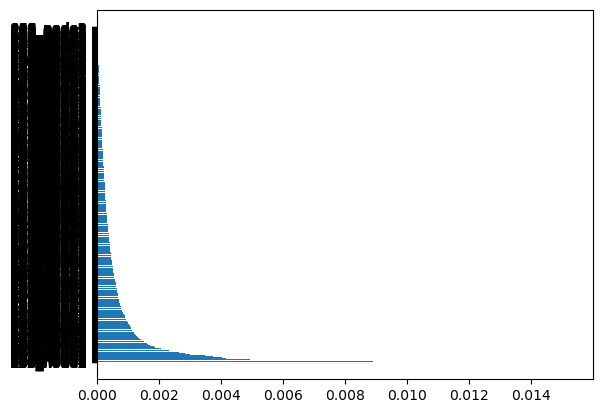

In [12]:
#Plot feature importances
plt.barh(feature_importances.index, feature_importances['importance'])

In [16]:
feature_importances.shape

(1864, 1)

In [41]:
#Create a list with the top 10% most important features
top_features = feature_importances.index[:int(feature_importances.shape[0]*0.1)].tolist()

In [42]:
len(top_features)

186

In [43]:
type(top_features[0])

str

In [45]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
#Select top features
X = df[top_features]
y = df['connected']
X = poly.fit_transform(X)

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

(10496, 1869)
(10496, 186)
(10496, 186)


In [46]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5971428571428572


In [51]:
#Create a list with the top 20% most important features
top_1_perc_features = feature_importances.index[:int(feature_importances.shape[0]*0.2)].tolist()

In [52]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
#Select top features
X = df[top_1_perc_features]
y = df['connected']
X = poly.fit_transform(X)

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6009523809523809


In [54]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
#Select top features
X = df[top_1_perc_features]
y = df['connected']
#X = poly.fit_transform(X)

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6076190476190476


In [62]:
#Create a list with the top 50% most important features
top_1_perc_features = feature_importances.index[:int(feature_importances.shape[0]*0.5)].tolist()

In [63]:
# Polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
#Select top features
X = df[top_1_perc_features]
y = df['connected']
#X = poly.fit_transform(X)

# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6323809523809524


### Test avec un GNN

In [9]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp

In [71]:
node_info_file = "node_information.csv"
node_info_df = pd.read_csv(node_info_file)
with open('train.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]

df_training_edges = pd.DataFrame(edges, columns=['node1', 'node2', 'connected'])
df_training_edges.head()

g = dgl.DGLGraph()

num_nodes = len(node_info_df)
g.add_nodes(num_nodes)
g.ndata["feat"] = torch.tensor(node_info_df.iloc[:, 1:].values)
src_nodes = df_training_edges["node1"].values
dst_nodes = df_training_edges["node2"].values
g.add_edges(src_nodes, dst_nodes)
g.add_edges(dst_nodes, src_nodes)

c:\Users\forma\anaconda3\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [72]:
# Split edge set for training and testing
u, v = g.edges()

eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_size = int(len(eids) * 0.1)
train_size = g.number_of_edges() - test_size
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

# Find all negative edges and split them for training and testing
adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
adj_neg = 1 - adj.todense() - np.eye(g.number_of_nodes())
neg_u, neg_v = np.where(adj_neg != 0)

neg_eids = np.random.choice(len(neg_u), g.number_of_edges())
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

In [73]:
train_g = dgl.remove_edges(g, eids[:test_size])

In [74]:
from dgl.nn import SAGEConv

# ----------- 2. create model -------------- #
# build a two-layer GraphSAGE model

class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats, dropout=0.3):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')
        self.conv3 = SAGEConv(h_feats, h_feats, 'mean')
        self.dropout = nn.Dropout(dropout)
        self.bn1 = nn.BatchNorm1d(h_feats)
        self.bn2 = nn.BatchNorm1d(h_feats)

    def forward(self, g, in_feat):
        # Perform forward pass
        h = in_feat.to(torch.float32)  # Convert input features to float32
        h = F.relu(self.bn1(self.conv1(g, h)))
        h = F.relu(self.bn2(self.conv2(g, h)))
        h = F.relu(self.conv3(g, h))
        h = self.dropout(h)  # Apply dropout
        return h
    
# ----------- 3. next steps -------------- #
    """
    - Add dropout OK 
    - Add batch OK
    - Add weight decay
    - Change number of layers OK
    - Change layer size
    """


In [75]:
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=g.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=g.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=g.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=g.number_of_nodes())

In [76]:
import dgl.function as fn

class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return g.edata['score'][:, 0]

In [77]:
class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 1)

    def apply_edges(self, edges):
        """
        Computes a scalar score for each edge of the given graph.

        Parameters
        ----------
        edges :
            Has three members ``src``, ``dst`` and ``data``, each of
            which is a dictionary representing the features of the
            source nodes, the destination nodes, and the edges
            themselves.

        Returns
        -------
        dict
            A dictionary of new edge features.
        """
        h = torch.cat([edges.src['h'], edges.dst['h']], 1)
        return {'score': self.W2(F.relu(self.W1(h))).squeeze(1)}
    

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            g.apply_edges(self.apply_edges)
            return g.edata['score']

In [78]:
import torch.nn.functional as F

class LinkPredictor(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers,
                 dropout):
        super(LinkPredictor, self).__init__()

        self.lins = nn.ModuleList()
        self.lins.append(nn.Linear(in_channels * 2, hidden_channels))  # Adjust input size for concatenation
        for _ in range(num_layers - 2):
            self.lins.append(nn.Linear(hidden_channels, hidden_channels))
        self.lins.append(nn.Linear(hidden_channels, out_channels))

        self.dropout = dropout

    def reset_parameters(self):
        for lin in self.lins:
            lin.reset_parameters()

    def forward(self, x_i, x_j):
        x = torch.cat([x_i, x_j], dim=1)  # Concatenate node representations
        for lin in self.lins[:-1]:
            x = lin(x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.lins[-1](x)
        return torch.sigmoid(x)


In [79]:
print(train_g.ndata['feat'].shape[1])

932


In [80]:
def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)

def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
    return roc_auc_score(labels, scores)

def compute_accuracy(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
    return accuracy_score(labels, scores.numpy() > 0)

In [196]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
model_MLP = GraphSAGE(train_g.ndata['feat'].shape[1], 16)
# You can replace DotPredictor with MLPPredictor.
pred = MLPPredictor(16)
#pred = DotPredictor()
optimizer = torch.optim.Adam(itertools.chain(model_MLP.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
num_epochs = 300


for e in range(num_epochs):
    # forward
    h = model_MLP(train_g, train_g.ndata['feat'])
    pos_score = pred(train_pos_g, h)
    neg_score = pred(train_neg_g, h)
    loss = compute_loss(pos_score, neg_score)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 20 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    print(len(pos_score))
    neg_score = pred(test_neg_g, h)
    print('AUC', compute_auc(pos_score, neg_score))
    print('Accuracy', compute_accuracy(pos_score, neg_score))

In epoch 0, loss: 0.6753793358802795
In epoch 20, loss: 0.30424126982688904
In epoch 40, loss: 0.2623659372329712
In epoch 60, loss: 0.24109283089637756
In epoch 80, loss: 0.22074995934963226
In epoch 100, loss: 0.20227359235286713
In epoch 120, loss: 0.1849384754896164
In epoch 140, loss: 0.1769050657749176
In epoch 160, loss: 0.16695213317871094
In epoch 180, loss: 0.15821680426597595
In epoch 200, loss: 0.14900949597358704
In epoch 220, loss: 0.1520131677389145
In epoch 240, loss: 0.1432284265756607
In epoch 260, loss: 0.13628238439559937
In epoch 280, loss: 0.13985460996627808
2099
AUC 0.9170249632246212
Accuracy 0.8708909004287756


In [29]:
predictions = []
for i in range(len(pos_score)):
    predictions.append(pos_score[i].item())
for i in range(len(neg_score)):
    predictions.append(neg_score[i].item())

labels = []
for i in range(len(test_pos_u)):
    labels.append(1)
for i in range(len(test_neg_u)):
    labels.append(0)



In [30]:
print(predictions)

[-0.3540377616882324, 0.3866558074951172, 3.788642406463623, -0.325239896774292, 3.1749675273895264, -0.9364334344863892, -1.4178340435028076, -0.8335636854171753, 3.2350807189941406, 1.388560175895691, 0.43119096755981445, 1.1391756534576416, 1.833040475845337, -1.6956777572631836, 1.0380445718765259, 3.6471261978149414, 2.060696840286255, -3.2169082164764404, 3.3436741828918457, -6.871074676513672, -3.0033650398254395, 1.5728614330291748, 0.6475460529327393, 0.39850181341171265, 1.312241554260254, 2.6100776195526123, -1.7300138473510742, 3.689523935317993, 0.5016522407531738, 3.2387964725494385, -1.7397637367248535, 1.4524366855621338, 1.081010103225708, 2.6051645278930664, 1.7534313201904297, 5.451614856719971, 3.4289841651916504, 0.9400469064712524, 4.123654365539551, 1.9933668375015259, 0.21502520143985748, 3.6978237628936768, 0.3048560619354248, -0.044093966484069824, 4.3378424644470215, 0.6866695284843445, -0.1476733684539795, 2.6425509452819824, 3.21044921875, 2.475475788116455

In [82]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
model = GraphSAGE(train_g.ndata['feat'].shape[1], 16)
# You can replace DotPredictor with MLPPredictor.
#pred = MLPPredictor(16)
pred = DotPredictor()
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
num_epochs = 200


for e in range(num_epochs):
    # forward
    h = model(train_g, train_g.ndata['feat'])
    pos_score = pred(train_pos_g, h)
    neg_score = pred(train_neg_g, h)
    loss = compute_loss(pos_score, neg_score)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 20 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    neg_score = pred(test_neg_g, h)
    print('AUC', compute_auc(pos_score, neg_score))
    print('Accuracy', compute_accuracy(pos_score, neg_score))

In epoch 0, loss: 1.9926464557647705
In epoch 20, loss: 0.608328640460968
In epoch 40, loss: 0.5703651309013367
In epoch 60, loss: 0.5432265400886536
In epoch 80, loss: 0.534136950969696
In epoch 100, loss: 0.5230781435966492
In epoch 120, loss: 0.5173643231391907
In epoch 140, loss: 0.51079922914505
In epoch 160, loss: 0.50308758020401
In epoch 180, loss: 0.4984759986400604
AUC 0.8352139599587
Accuracy 0.8182467841829443


In [83]:
#With LinkPredictor
model = GraphSAGE(train_g.ndata['feat'].shape[1], 16)
pred = LinkPredictor(16, 16, 1, 2, 0.5)

# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
num_epochs = 200

def compute_loss_LP(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0],1), torch.zeros(neg_score.shape[0],1)], dim=0)
    return F.binary_cross_entropy_with_logits(scores, labels)


for e in range(num_epochs):
    # forward
    h = model(train_g, train_g.ndata['feat'])
    pos_score = pred(h[train_pos_g.edges()[0]], h[train_pos_g.edges()[1]])  # Extract node representations from h
    neg_score = pred(h[train_neg_g.edges()[0]], h[train_neg_g.edges()[1]])  # Extract node representations from h
    loss = compute_loss_LP(pos_score, neg_score)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 20 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))


# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    # Extract node representations for positive edges
    pos_src = h[test_pos_g.edges()[0]]
    pos_dst = h[test_pos_g.edges()[1]]
    pos_score = pred(pos_src, pos_dst)

    # Extract node representations for negative edges
    neg_src = h[test_neg_g.edges()[0]]
    neg_dst = h[test_neg_g.edges()[1]]
    neg_score = pred(neg_src, neg_dst)

    print('AUC', compute_auc(pos_score, neg_score))
    print('Accuracy', compute_accuracy(pos_score, neg_score))


In epoch 0, loss: 0.7195329070091248
In epoch 20, loss: 0.5738853812217712
In epoch 40, loss: 0.5683764815330505
In epoch 60, loss: 0.5638197064399719
In epoch 80, loss: 0.5575698018074036
In epoch 100, loss: 0.5533541440963745
In epoch 120, loss: 0.5503260493278503
In epoch 140, loss: 0.5497885942459106
In epoch 160, loss: 0.5488748550415039
In epoch 180, loss: 0.5475243330001831
AUC 0.9063894397409233
Accuracy 0.7477370176274416


## 3. Generate submission files

### Submission Emma

In [100]:
import os 
import numpy as np

In [101]:
with open("test.txt", "r") as f:
    reader = csv.reader(f)
    test_set = list(reader)
test_set = [element[0].split(" ") for element in test_set]
test_df = pd.DataFrame(test_set, columns=['node1', 'node2'])
test_df['node1'] = test_df['node1'].astype('int64')
test_df['node2'] = test_df['node2'].astype('int64')


df_test = pd.merge(test_df, df_features, left_on='node1', right_on='node', how='inner')
df_test = pd.merge(df_test, df_features, left_on='node2', right_on='node', how='inner', suffixes=('_node1', '_node2'))

X_test = df_test.drop(['node1', 'node2', 'node_node1', "node_node2"], axis=1)

In [102]:
preds = model.predict(X_test)
preds = zip(np.array(range(len(test_set))), preds)

In [103]:
os.makedirs("models", exist_ok=True)
i = len(os.listdir("models")) +1
model_path = f"models/model_{i}.csv"
     
with open(model_path,"w") as pred:
    csv_out = csv.writer(pred)
    csv_out.writerow(i for i in ["ID", "Predicted"])
    for row in preds:
         csv_out.writerow(row)
    pred.close()


### Generate submission file for GNN Martin

In [35]:
with open('test.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]

df_testing_edges = pd.DataFrame(edges, columns=['node1', 'node2'])
df_testing_edges.head()

,node1,node2
0,3425,4524
1,1620,2617
2,4832,6317
3,4984,7298
4,385,5481


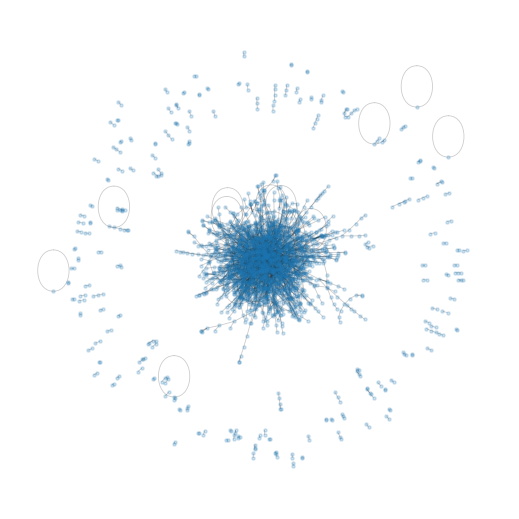

In [36]:
testing_graph = nx.from_pandas_edgelist(df_testing_edges, source='node1', target='node2', create_using=nx.Graph())
plt.figure(figsize=(5,5))

nx.draw(testing_graph, node_size = 5, alpha = 0.2, width = 0.6)

plt.show()

In [176]:
node_info_file = "node_information.csv"
node_info_df = pd.read_csv(node_info_file)
with open('test.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]

df_testing_edges = pd.DataFrame(edges, columns=['node1', 'node2'])
print(df_testing_edges.head())

g = dgl.DGLGraph()

num_nodes = len(node_info_df)
g.add_nodes(num_nodes)
g.ndata["feat"] = torch.tensor(node_info_df.iloc[:, 1:].values)
src_nodes = df_testing_edges["node1"].values
dst_nodes = df_testing_edges["node2"].values
g.add_edges(src_nodes, dst_nodes)
test_g = g

   node1  node2
0   3425   4524
1   1620   2617
2   4832   6317
3   4984   7298
4    385   5481


c:\Users\forma\anaconda3\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [197]:
pred = MLPPredictor(16)
with torch.no_grad():
    h_test = model_MLP(test_g, test_g.ndata['feat'])
    test_scores = pred(test_g, h_test)
    #Set 0 for negative values and 1 for positive values
    test_scores = test_scores.numpy()
    test_scores[test_scores <= 0] = 0
    test_scores[test_scores > 0] = 1
    test_scores = test_scores.astype(int)
    test_scores = list(test_scores)

test_preds = list(zip(np.array(range(len(g.nodes()))), test_scores))

In [198]:
import os
os.makedirs("models", exist_ok=True)
i = len(os.listdir("models")) +1
model_path = f"models/model_MLP_Martin.csv"
     
with open(model_path,"w") as prediction:
    csv_out = csv.writer(prediction)
    csv_out.writerow(i for i in ["ID", "Predicted"])
    for row in test_preds:
         csv_out.writerow(row)
    prediction.close()

res = pd.read_csv(model_path)
#save res to csv
res.to_csv(model_path, index=False)

2